In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

## Load the dataset mnist fashion

In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

data_dir = 'G:/Ponti/'
batch_size = 32
img_height = 180  # Set the height of the images
img_width = 180  # Set the width of the images
channels = 3  # RGB Images

# Load the dataset using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # Rescale the pixel values to [0, 1]

data_flow = datagen.flow_from_directory(data_dir,
                                        target_size=(img_height, img_width),
                                        batch_size=batch_size,
                                        class_mode='categorical')  # or 'categorical' for multi-class problem

# Get the class labels
class_labels = data_flow.class_indices

# Load all images into memory
X = []
y = []
for _ in range(data_flow.samples // batch_size + 1):  # `//` performs integer division
    imgs, labels = next(data_flow)
    X.extend(imgs)
    y.extend(labels)
X = np.stack(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have NumPy arrays: X_train, X_test, y_train, y_test


Found 836 images belonging to 4 classes.


## Visualize the data

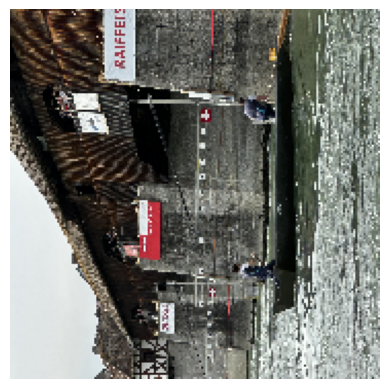

In [3]:
# extra code
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

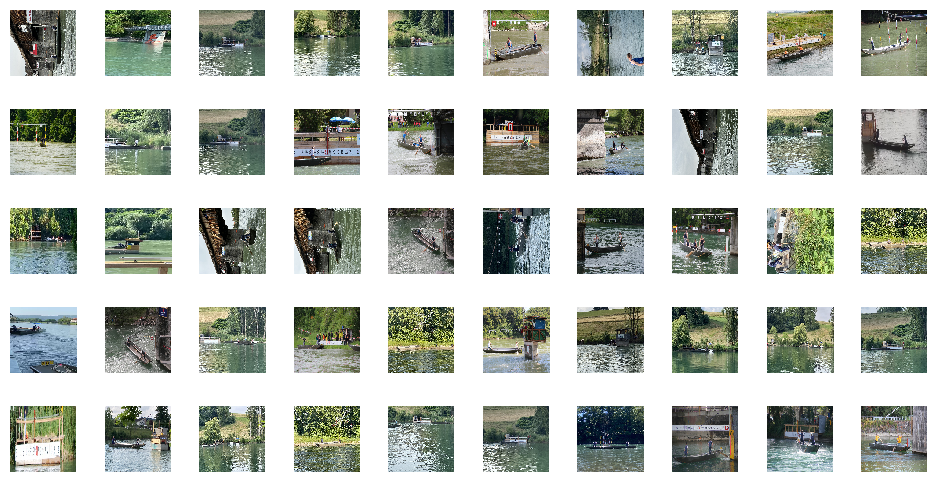

In [4]:
# extra code – this cell generates and saves Figure 10–10
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Create a model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 4  # replace this with the number of classes in your problem

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # for multi-class classification
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # for multi-class classification with integer labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
19/19 [==============================] - 11s 558ms/step - loss: 2.5281 - accuracy: 0.3362 - val_loss: 1.3061 - val_accuracy: 0.4054
Epoch 2/10
19/19 [==============================] - 10s 542ms/step - loss: 1.2928 - accuracy: 0.3463 - val_loss: 1.2459 - val_accuracy: 0.5338
Epoch 3/10
19/19 [==============================] - 10s 538ms/step - loss: 1.0434 - accuracy: 0.6044 - val_loss: 1.1114 - val_accuracy: 0.5473
Epoch 4/10
19/19 [==============================] - 10s 553ms/step - loss: 0.6938 - accuracy: 0.7504 - val_loss: 0.8905 - val_accuracy: 0.6216
Epoch 5/10
19/19 [==============================] - 11s 553ms/step - loss: 0.4219 - accuracy: 0.8744 - val_loss: 0.9268 - val_accuracy: 0.6486
Epoch 6/10
19/19 [==============================] - 10s 551ms/step - loss: 0.2187 - accuracy: 0.9542 - val_loss: 0.9432 - val_accuracy: 0.6622
Epoch 7/10
19/19 [==============================] - 10s 538ms/step - loss: 0.1090 - accuracy: 0.9796 - val_loss: 0.9097 - val_accuracy: 0.6689

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 118336)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:

history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)


Epoch 1/15
15/15 [==============================] - 9s 554ms/step - loss: 0.3163 - accuracy: 0.9045 - val_loss: 0.2120 - val_accuracy: 0.9492
Epoch 2/15
15/15 [==============================] - 8s 534ms/step - loss: 0.1309 - accuracy: 0.9830 - val_loss: 0.0622 - val_accuracy: 1.0000
Epoch 3/15
15/15 [==============================] - 8s 530ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 4/15
15/15 [==============================] - 8s 539ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 8s 536ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 6/15
15/15 [==============================] - 8s 536ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 8s 533ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('test loss: ' + str(test_loss))
print('test accuracy: ' + str(test_accuracy))

5/5 [==============================] - 1s 135ms/step - loss: 1.2849 - accuracy: 0.6419
test loss: 1.2848607301712036
test accuracy: 0.6418918967247009


5/5 - 1s - loss: 1.2849 - accuracy: 0.6419 - 659ms/epoch - 132ms/step


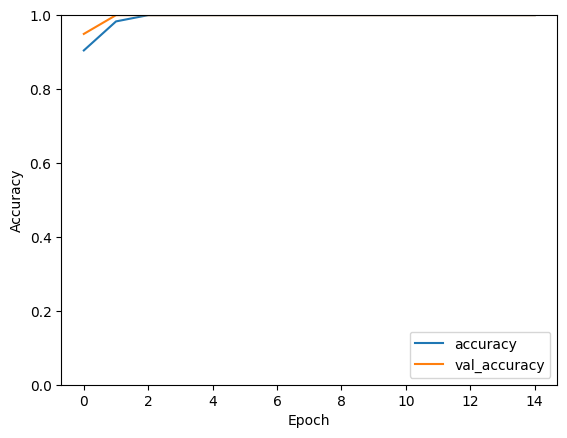

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

19/19 [==============================] - 3s 136ms/step


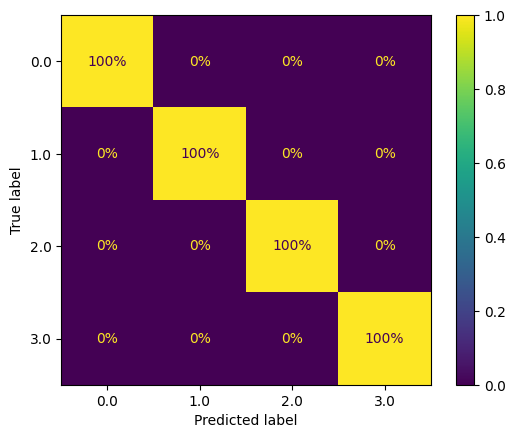

5/5 [==============================] - 1s 125ms/step


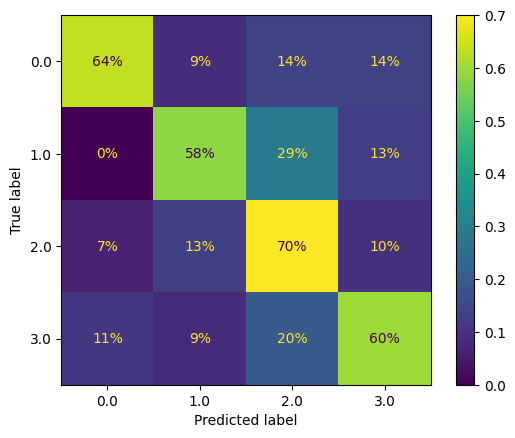

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

train_pred = model.predict(X_train)
train_predicted = np.argmax(train_pred, axis=1)

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, train_predicted,
                                        normalize="true", values_format=".0%")
plt.show()


test_pred = model.predict(X_test)
test_predicted = np.argmax(test_pred, axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, test_predicted,
                                        normalize="true", values_format=".0%")
plt.show()

### Show images that were classified wrong

In [12]:
# show image that were classified incorectly
cl_a, cl_b = 0, 6
X_aa = X_train[np.intersect1d(np.where(y_train == cl_a)[0], np.where(train_predicted == cl_a)[0])]
X_ab = X_train[np.intersect1d(np.where(y_train == cl_a)[0], np.where(train_predicted == cl_b)[0])]
X_ba = X_train[np.intersect1d(np.where(y_train == cl_b)[0], np.where(train_predicted == cl_a)[0])]
X_bb = X_train[np.intersect1d(np.where(y_train == cl_b)[0], np.where(train_predicted == cl_b)[0])]

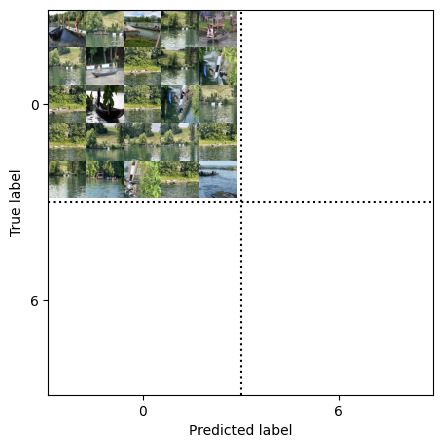

In [13]:
import matplotlib.pyplot as plt
import numpy as np

size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                        (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(np.squeeze(image_data), cmap="binary",
                extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
